In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tesserocr import PyTessBaseAPI

<IPython.core.display.Javascript object>


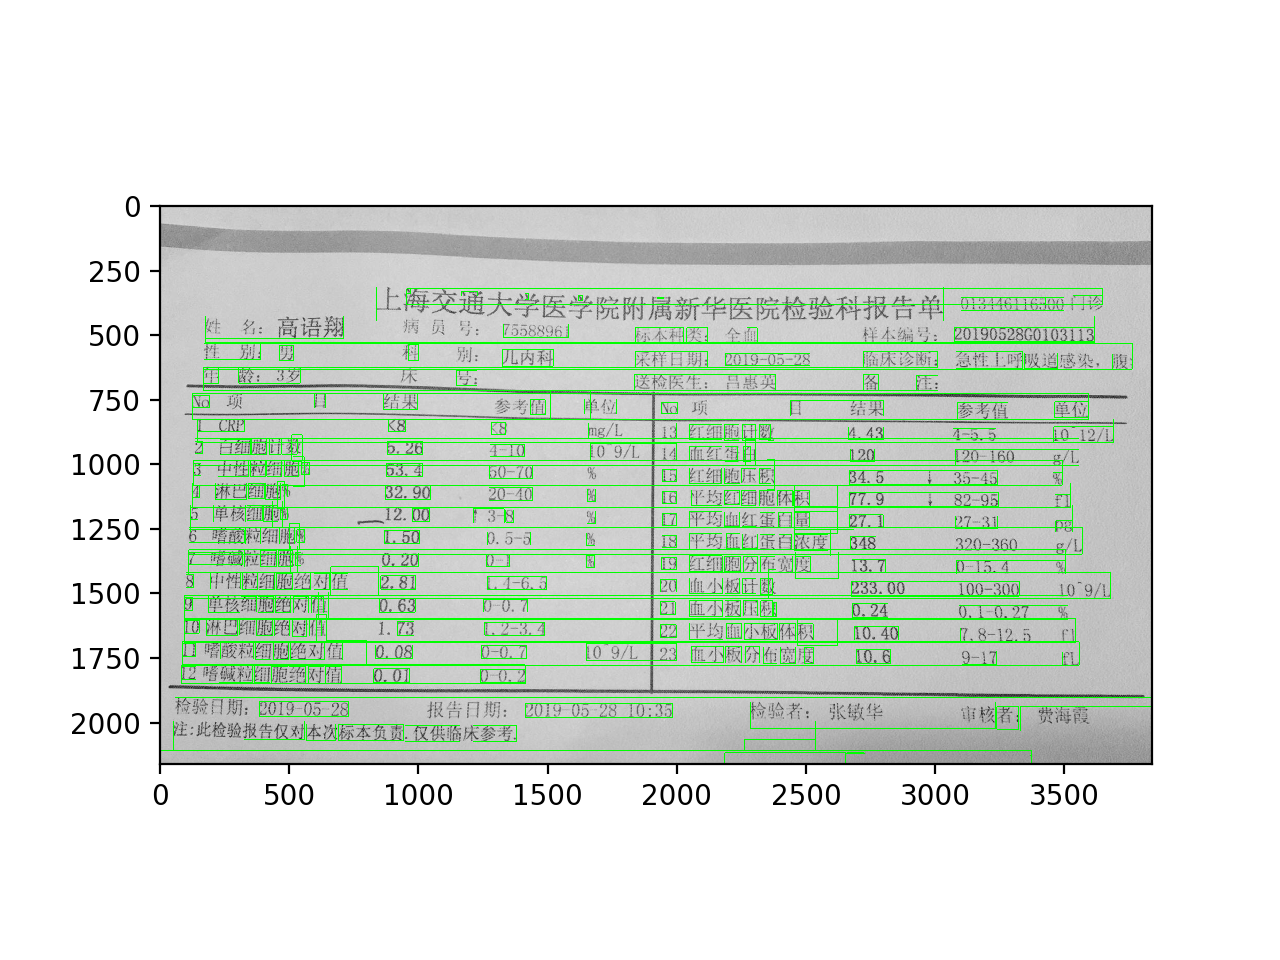

In [9]:
img = cv2.imread('bloodtest_resize.jpg')
box = pd.read_csv('bloodtest_para.tsv', delimiter='\t')

for i in range(len(box)):
    x, y, w, h = box.iloc[i]['left'], box.iloc[i]['top'], box.iloc[i]['width'], box.iloc[i]['height']
    cv2.rectangle(img, (x,y), (x+w, y+h),(0,255,0),2)
plt.imshow(img,'brg')



In [7]:
%matplotlib notebook

In [207]:
def captch_ex(file_name):
    img = cv2.imread(file_name)

    img_final = cv2.imread(file_name)
    img2gray = cv2.imread(file_name, 0)
#     img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY_INV)  # for black text , cv.THRESH_BINARY_INV
    '''
            line  8 to 12  : Remove noisy portion 
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                         3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(new_img, kernel, iterations=5)  # dilate , more the iteration more the dilation

    # for cv2.x.x

    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # findContours returns 3 variables for getting contours

    # for cv3.x.x comment above line and uncomment line below

    #image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    results = []
    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue
        results.append((x, y, w, h))
        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

        '''
        #you can crop image and send to OCR  , false detected will return no text :)
        cropped = img_final[y :y +  h , x : x + w]

        s = file_name + '/crop_' + str(index) + '.jpg' 
        cv2.imwrite(s , cropped)
        index = index + 1

        '''
    # write original image with added contours to disk
    plt.imshow(img, 'gray')
#     results = sorted(results, key=lambda r:r[0][1])
    return results


file_name = 'bloodtest.jpg'
results = captch_ex(file_name)

<IPython.core.display.Javascript object>


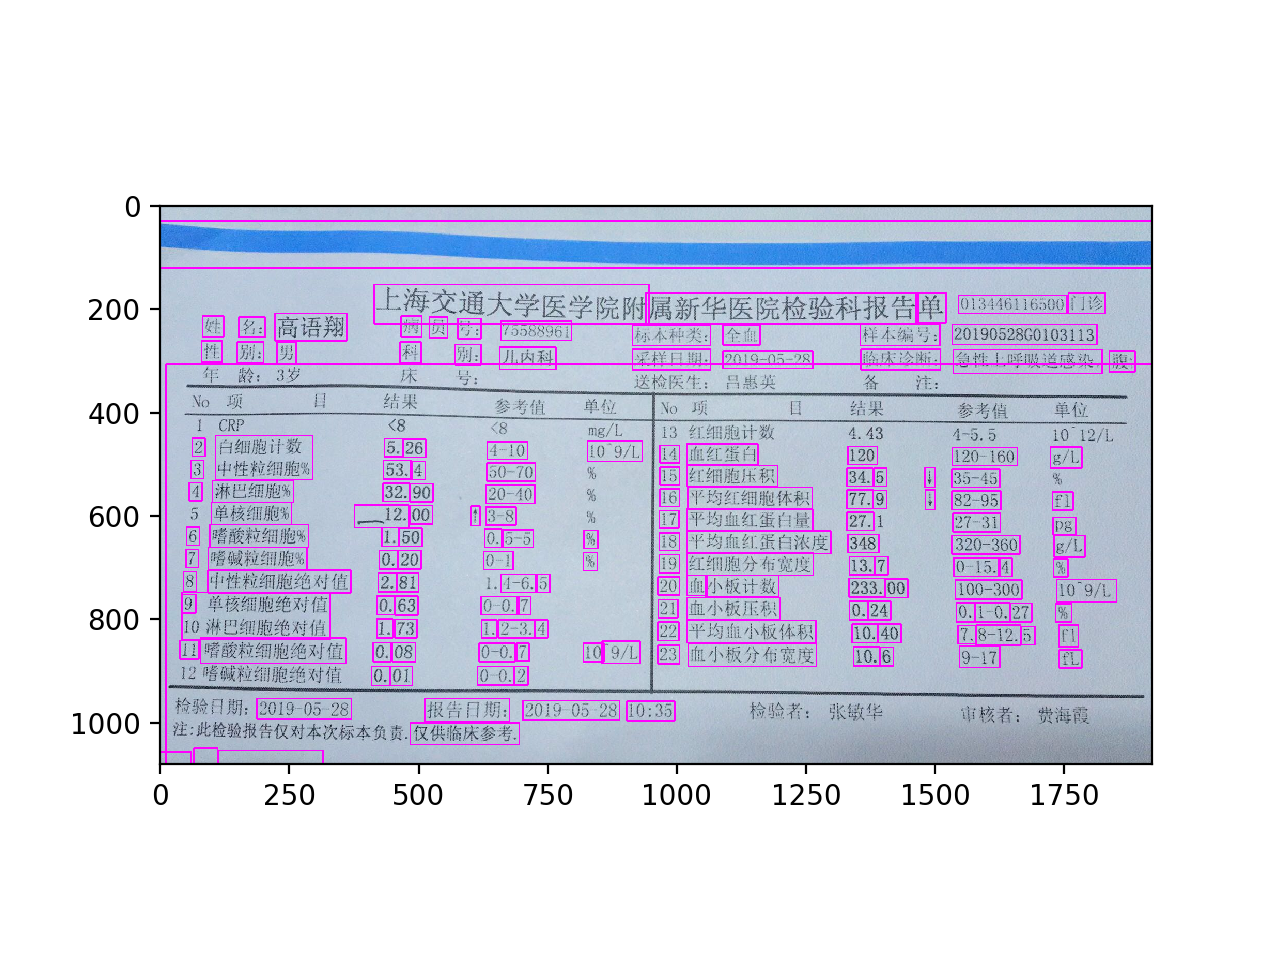

In [137]:
with PyTessBaseAPI(lang='chi_sim',psm=7) as api:
    img = cv2.imread('bloodtest.jpg')
    text = []
    api.SetVariable('tessedit_char_whitelist','<=-～()+-abcdefghijklmnopqrstuvwxyz/葡萄糖白细胞计数中性目百变异系标准差网织率总比↑ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890.%淋巴细胞单核嗜酸粒碱绝对值红蛋血压积平均量浓度分布宽小板体性沉大肺炎支原')
    api.SetVariable('preserve_interword_spaces','1')
    api.SetImageFile('bloodtest.jpg')
    for i in range(len(results)):
        x, y, w, h = results[i][0], results[i][1], results[i][2], results[i][3]
        api.SetRectangle(x,y,w,h)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
        text.append(api.GetUTF8Text())
plt.imshow(img, 'gray')

<IPython.core.display.Javascript object>


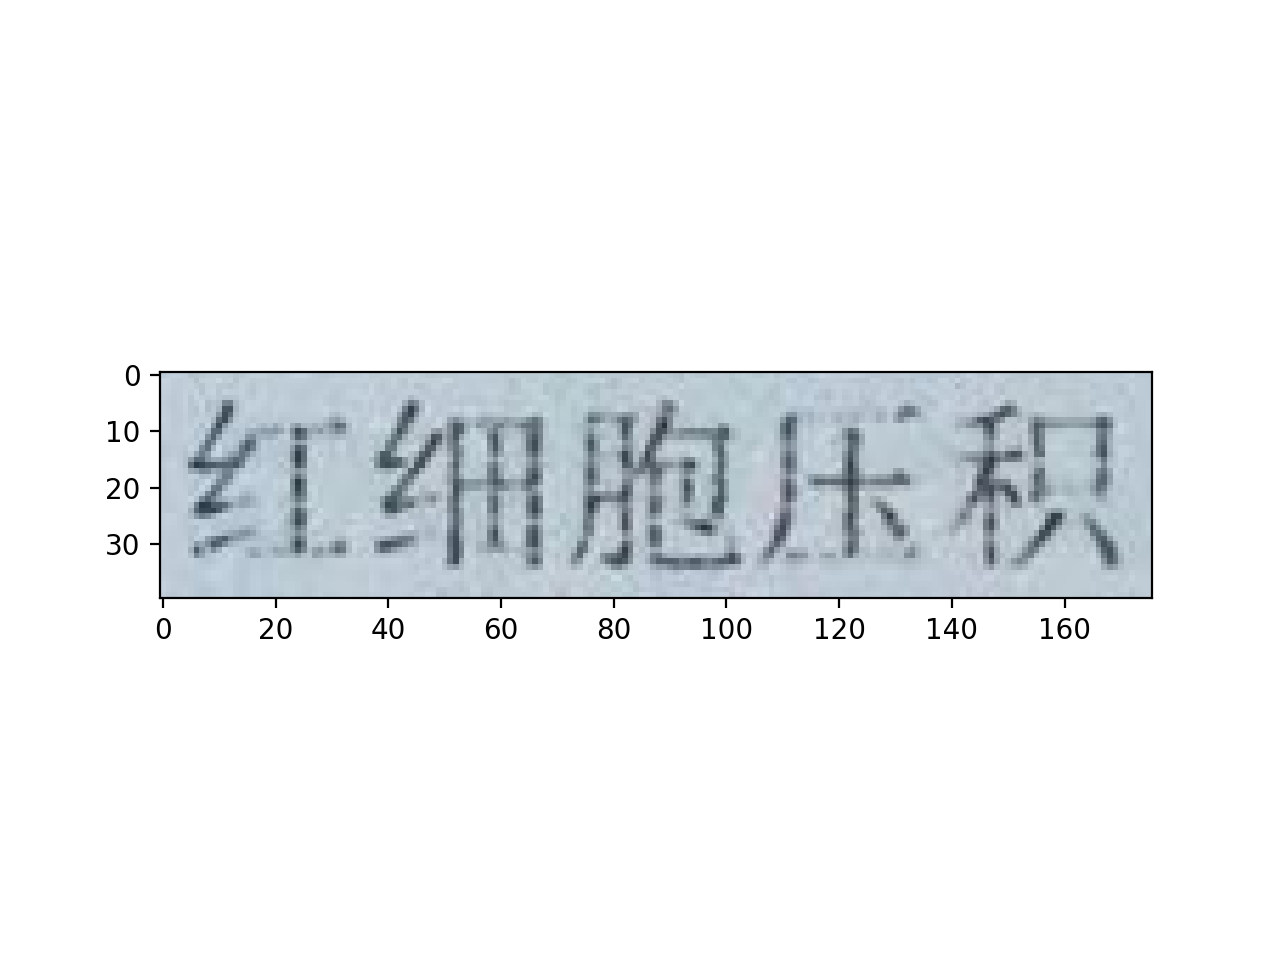

In [231]:
img = cv2.imread('bloodtest.jpg')
x, y, w, h = results[118][0], results[118][1], results[118][2], results[118][3]
crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img, 'gray')

In [232]:
cv2.imwrite('cropped.jpg', crop_img)

True

In [233]:
with PyTessBaseAPI(lang='chi_sim',psm=7) as api:
    api.SetVariable('tessedit_char_whitelist','<=-～()+-abcdefghijklmnopqrstuvwxyz/葡萄糖白细胞计数中性目百变异系标准差网织率总比↑ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890.%淋巴细胞单核嗜酸粒碱绝对值红蛋血压积平均量浓度分布宽小板体性沉大肺炎支原')
    api.SetVariable('preserve_interword_spaces','1')
    api.SetImageFile('cropped.jpg')
    text2 = api.GetUTF8Text()



In [234]:
text2

'细胞积\n'